In [ ]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
Data = pd.read_csv(r"F:\PCA_20_features\PCA_20_features.csv")
Data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,231
0,25.022356,-6.799958,-5.016250,4.581315,-11.306539,4.426036,13.180123,2.459563,8.429075,-1.679232,...,-1.494234,4.459849,-3.105590,-2.073293,-1.532261,4.878658,-2.927456,7.759248,6.571644,0.0
1,-2.844736,-1.265252,1.738377,0.484612,0.022045,0.443640,-0.925560,-0.217946,0.753162,0.682743,...,-0.814074,0.368062,1.119930,0.535137,1.137608,-0.489140,-0.113873,-0.023101,-0.634012,0.0
2,-3.071476,-1.015506,2.156695,-2.202537,-4.595725,1.106969,-2.112005,-0.310945,3.380887,-1.529304,...,-0.904437,0.732868,0.189963,-0.246212,0.543588,-0.534095,-0.192307,0.155150,0.785082,0.0
3,-4.920069,-1.329368,1.986788,-0.895050,2.066811,2.509160,-0.354943,0.878185,0.526922,1.098313,...,-0.291981,1.617216,-0.228556,-0.022398,-0.291541,0.186455,0.086554,-0.927143,0.308171,0.0
4,0.770259,-1.559405,2.545578,-1.118795,0.540490,3.438093,-0.584477,-2.273167,-3.289307,-0.905880,...,0.524261,0.664633,-1.651213,-1.361999,-1.512542,0.667240,-0.696905,-0.379874,0.483805,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,-7.751959,0.775206,-1.339623,-1.686491,1.232281,0.097654,0.221657,-0.863374,0.297561,-0.053956,...,-0.157246,-0.393818,-0.650976,-0.662818,0.515276,0.427902,0.185611,-0.440108,0.142428,0.0
47872,-3.741647,-1.106958,-0.421251,-0.477359,0.693464,-0.077072,0.238473,1.366970,1.266009,-0.304988,...,-0.439573,-0.249050,1.318808,-1.624189,0.165268,0.033013,0.355185,-0.390979,-0.268773,0.0
47873,-6.544203,1.804694,-1.886439,-1.361567,0.314316,-1.266477,-0.810861,0.313862,-1.334900,-0.490203,...,0.001488,-0.108921,-0.897002,0.157056,-0.289176,-0.042475,0.363187,-0.053521,-0.137937,0.0
47874,19.540495,16.103253,-7.299638,-4.989192,3.433336,3.265255,0.011561,-0.609568,-0.453411,0.539367,...,-0.946517,-0.247224,-0.455614,0.385181,-0.063998,1.154159,-0.096725,-0.039695,2.445721,0.0


In [ ]:
Data.shape

(47876, 21)

## **Model Prepration**

# Brack Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

In [ ]:
X.shape

(47876, 20)

In [ ]:
y.shape

(47876,)

# Test and Train Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_test.shape

(14363, 20)

In [ ]:
print('X_Train set shape is',format(X_train.shape))
print('X_Test set shape is',format(X_test.shape))

X_Train set shape is (33513, 20)
X_Test set shape is (14363, 20)


In [ ]:
print('Y_Train set shape is',format(y_train.shape))
print('Y_Test set shape is',format(y_test.shape))

Y_Train set shape is (33513,)
Y_Test set shape is (14363,)


In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.882911     0.0  0.882911      0.441456      0.779532
recall         1.000000     0.0  0.882911      0.500000      0.882911
f1-score       0.937815     0.0  0.882911      0.468907      0.828007
support    29589.000000  3924.0  0.882911  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3924     0]]

Test Result:
Accuracy Score: 87.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.878630     0.0  0.878507      0.439315      0.772005
recall         0.999842     0.0  0.878507      0.499921      0.878507
f1-score       0.935325     0.0  0.878507      0.467662      0.821820
support    12620.000000  1743.0  0.878507  14363.000000

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Confusion Matrix

Confusion Matrix for Training

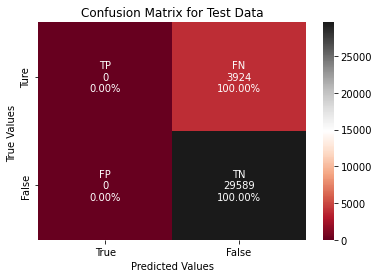

In [ ]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

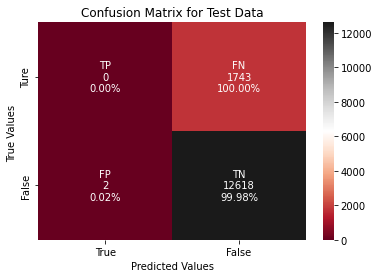

In [ ]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.6499117247093885

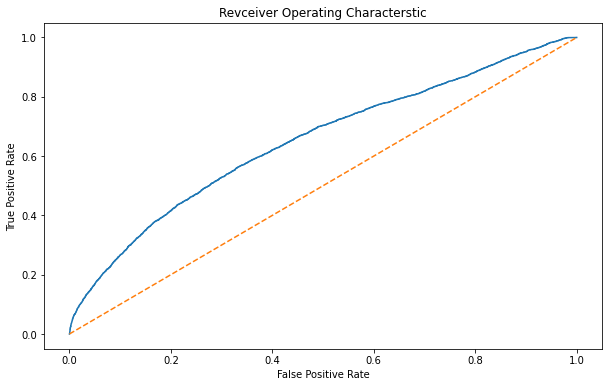

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.6397057098668616

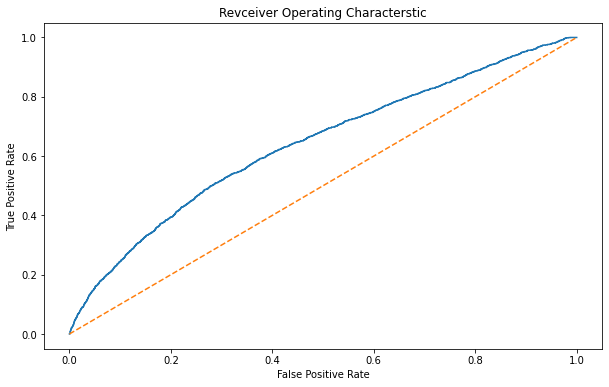

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728


## 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.891932     0.873418  0.891714      0.882675      0.889764
recall         0.998310     0.087920  0.891714      0.543115      0.891714
f1-score       0.942128     0.159759  0.891714      0.550943      0.850521
support    29589.000000  3924.000000  0.891714  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29539    50]
 [ 3579   345]]

Test Result:
Accuracy Score: 88.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.886668     0.847134  0.886235      0.866901      0.881870
recall         0.998098     0.076305  0.886235      0.537202      0.886235
f1-score       0.939089     0.140000  0.886235      0.539544      0.842117
support   

# Confusion Matrix

Confusion Matrix for Training

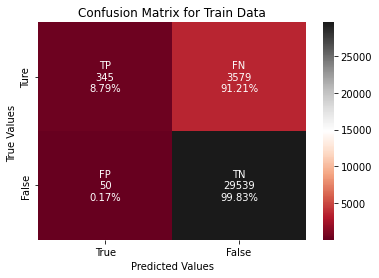

In [ ]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

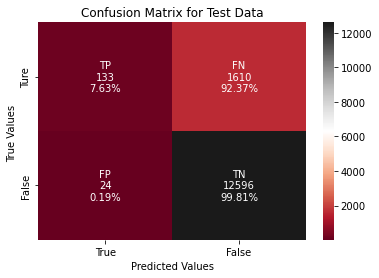

In [ ]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8376803535311098

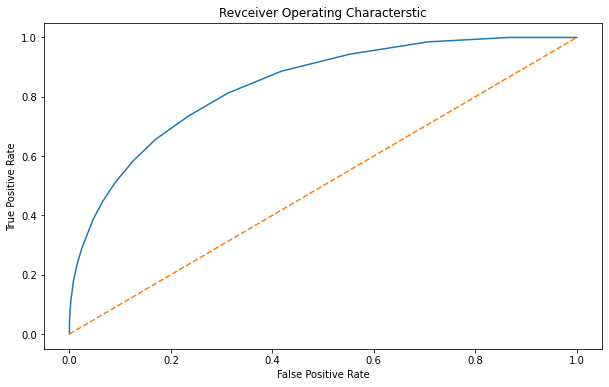

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7760435220619858

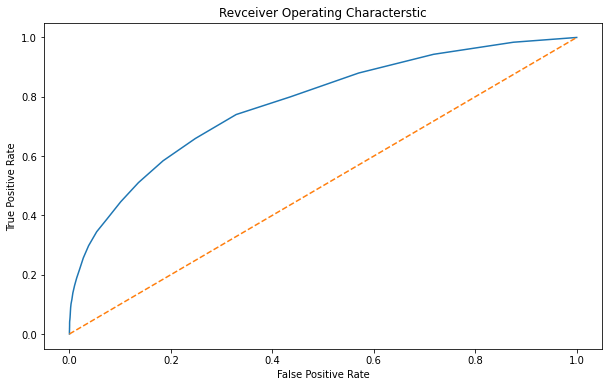

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

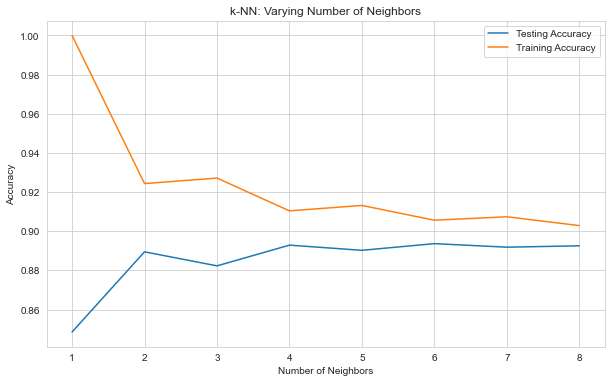

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_5216\1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,89.171366,88.623547


## 3. Support Vector machine

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.887276     0.993976  0.887805      0.940626      0.899770
recall         0.999966     0.042049  0.887805      0.521008      0.887805
f1-score       0.940257     0.080685  0.887805      0.510471      0.839610
support    29589.000000  3924.000000  0.887805  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29588     1]
 [ 3759   165]]

Test Result:
Accuracy Score: 88.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.880128     0.806452  0.879969      0.843290      0.871187
recall         0.999525     0.014343  0.879969      0.506934      0.879969
f1-score       0.936034     0.028185  0.879969      0.482110      0.825864
support   

# Confusion Matrix

Confusion Matrix for Training 

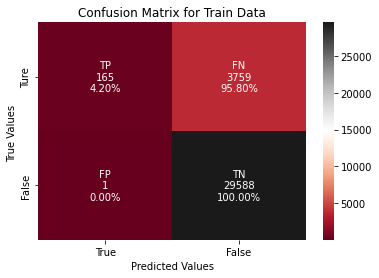

In [ ]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

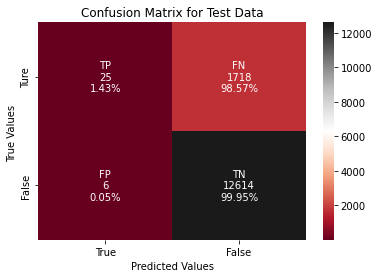

In [ ]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.820852224920762

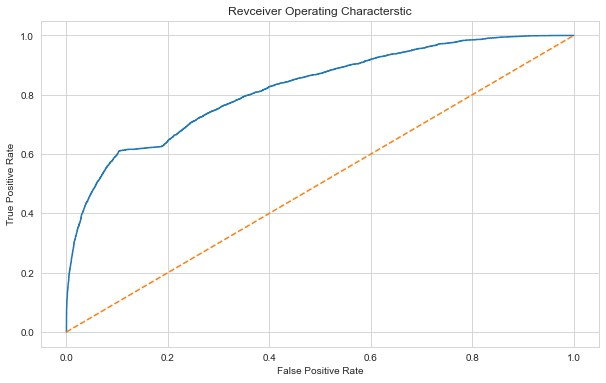

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7258896577935015

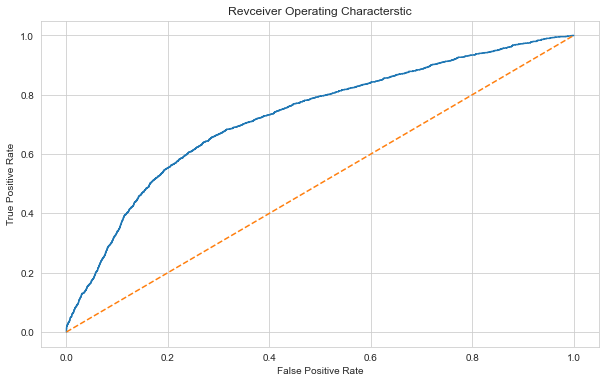

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937


# 4. LGBMClassifier

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train, y_train)

print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 90.58%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.904033     0.976368  0.905768      0.940200      0.912502
recall         0.999358     0.200051  0.905768      0.599704      0.905768
f1-score       0.949308     0.332064  0.905768      0.640686      0.877036
support    29589.000000  3924.000000  0.905768  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29570    19]
 [ 3139   785]]

Test Result:
Accuracy Score: 88.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.889416     0.786026  0.887767      0.837721      0.876869
recall         0.996117     0.103270  0.887767      0.549694      0.887767
f1-score       0.939747     0.182556  0.8

# Confusion Matrix

Confusion Matrix for Training

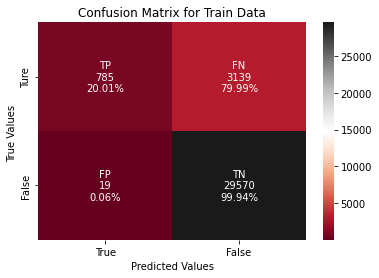

In [ ]:
y_pred = lgbmc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

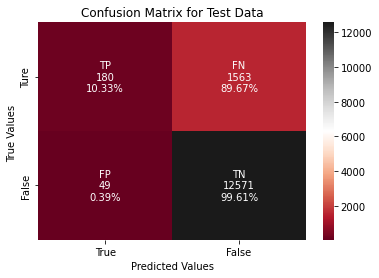

In [ ]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9215138667154217

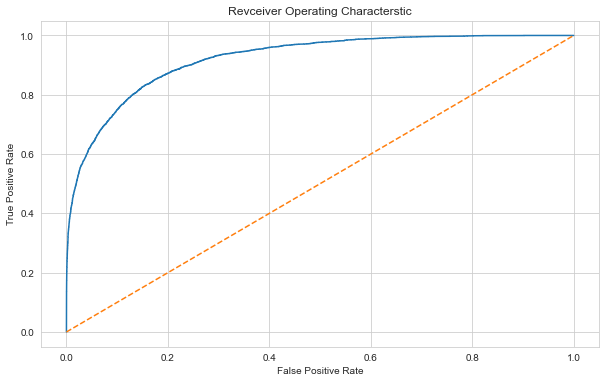

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7738845351976164

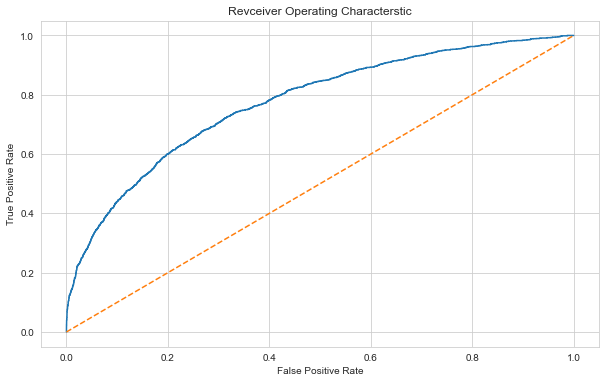

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, lgbmc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbmc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBMClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718


## 5. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.889919     0.570588   0.88506      0.730254      0.852529
recall         0.992599     0.074159   0.88506      0.533379      0.885060
f1-score       0.938459     0.131258   0.88506      0.534859      0.843944
support    29589.000000  3924.000000   0.88506  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29370   219]
 [ 3633   291]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.883949     0.471963  0.877811      0.677956      0.833953
recall         0.991046     0.057946  0.877811      0.524496      0.877811
f1-score       0.934439     0.103219  0.877811      0.518829      0.833568
support   

# Confusion Matrix

Confusion Matrix for Training 

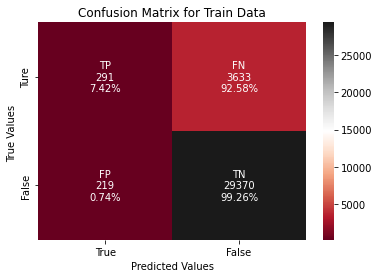

In [ ]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

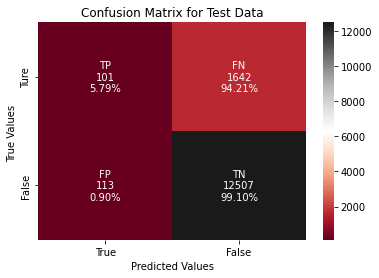

In [ ]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8099451958360288

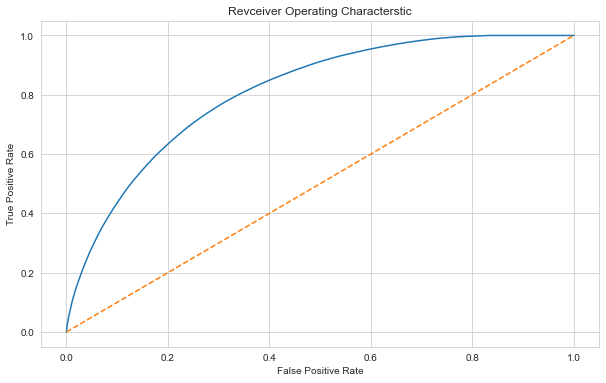

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.702411934357307

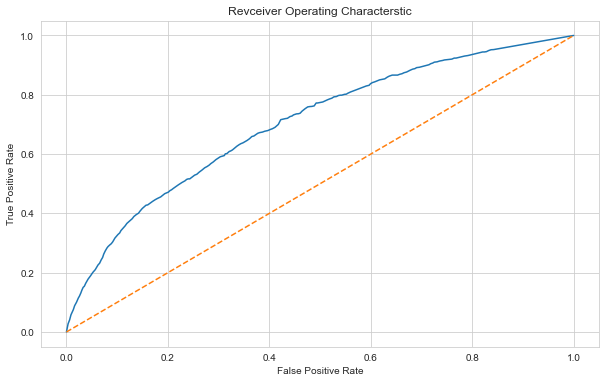

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104


## 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.884177     1.000000  0.884343      0.942089      0.897739
recall         1.000000     0.012232  0.884343      0.506116      0.884343
f1-score       0.938529     0.024169  0.884343      0.481349      0.831468
support    29589.000000  3924.000000  0.884343  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3876    48]]

Test Result:
Accuracy Score: 87.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.879557     0.937500  0.879621      0.908528      0.886588
recall         0.999921     0.008606  0.879621      0.504263      0.879621
f1-score       0.935885     0.017055  0.879621      0.476470      0.824381
support   

# Confusion Matrix

Confusion Matrix for Training

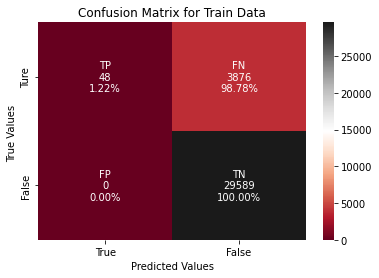

In [ ]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

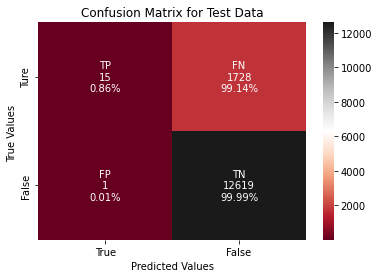

In [ ]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.841375235217898

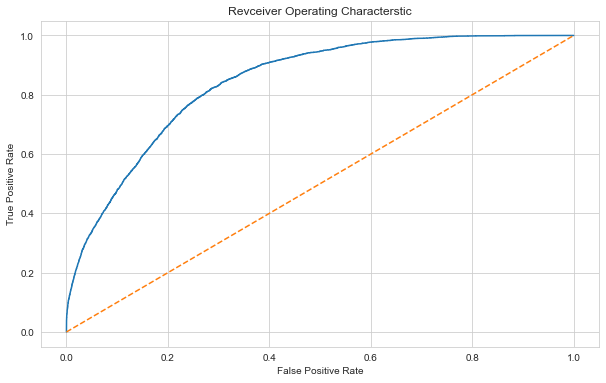

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7547486754807321

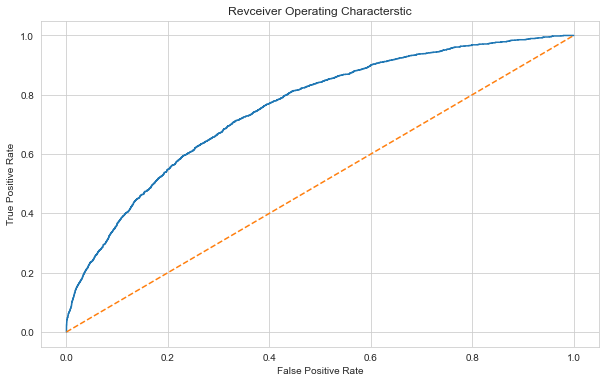

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125


## 7. XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 94.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.942790     0.988399  0.945723      0.965594      0.948130
recall         0.999155     0.542813  0.945723      0.770984      0.945723
f1-score       0.970154     0.700773  0.945723      0.835464      0.938613
support    29589.000000  3924.000000  0.945723  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29564    25]
 [ 1794  2130]]

Test Result:
Accuracy Score: 88.74%
_______________________________________________
CLASSIFICATION REPORT:


# Confusion Matrix

Confusion Matrix for Training

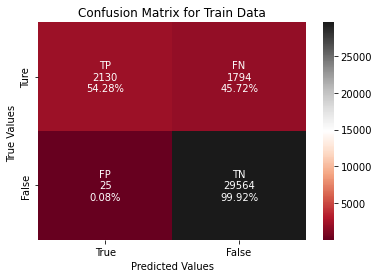

In [ ]:
y_pred = xgb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

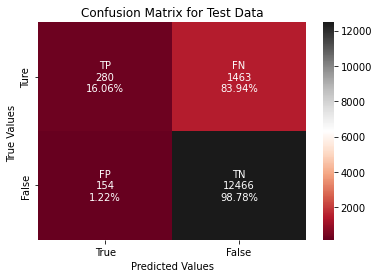

In [ ]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9834916145966991

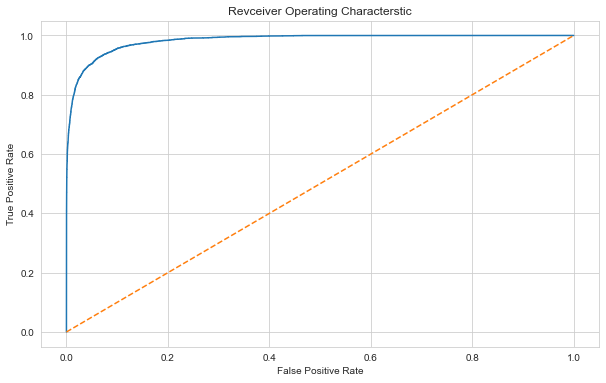

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7671205082953503

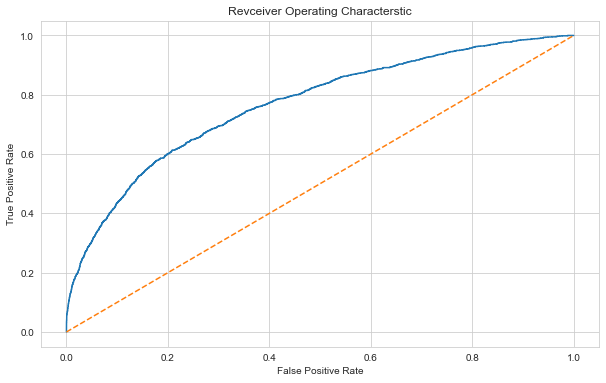

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125
6,XGBoost Classifier,94.572256,88.741906


# 8. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=20,)
ab_clf.fit(X_train, y_train)

print_score(ab_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ab_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.883430     0.677419  0.883239      0.780425      0.859308
recall         0.999662     0.005352  0.883239      0.502507      0.883239
f1-score       0.937959     0.010619  0.883239      0.474289      0.829378
support    29589.000000  3924.000000  0.883239  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29579    10]
 [ 3903    21]]

Test Result:
Accuracy Score: 87.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.878980     0.600000  0.878786      0.739490      0.845125
recall         0.999683     0.003442  0.878786      0.501563      0.878786
f1-score       0.935454     0.006845  0.878786      0.471150      0.822764
support   

# Confusion Matrix

Confusion Matrix for Training

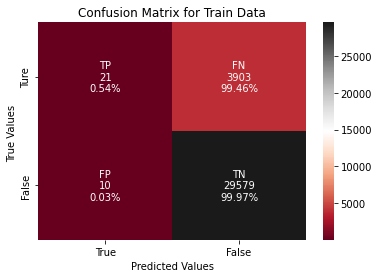

In [ ]:
y_pred = ab_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

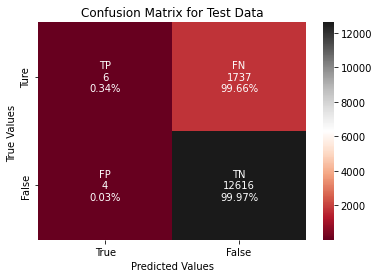

In [ ]:
y_pred = ab_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.7029875338691207

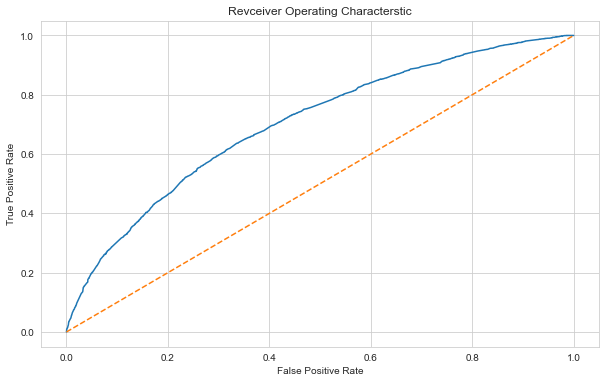

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.6822026162153709

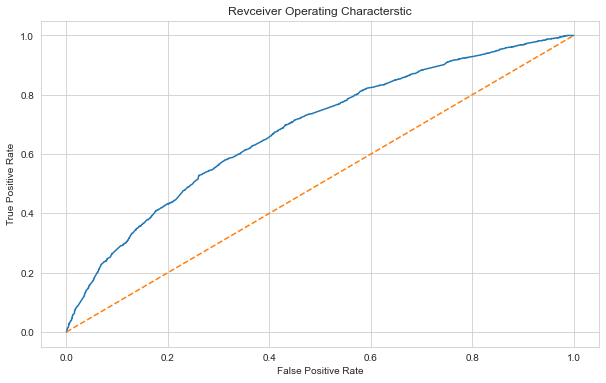

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, ab_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ab_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125
6,XGBoost Classifier,94.572256,88.741906
7,AdaBoostClassifier,88.323934,87.878577


# 9. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.888408     0.941441   0.88876      0.914925      0.894618
recall         0.999561     0.053262   0.88876      0.526411      0.888760
f1-score       0.940712     0.100820   0.88876      0.520766      0.842370
support    29589.000000  3924.000000   0.88876  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29576    13]
 [ 3715   209]]

Test Result:
Accuracy Score: 88.18%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.882423     0.771084   0.88178      0.826754      0.868912
recall         0.998494     0.036718   0.88178      0.517606      0.881780
f1-score       0.936877     0.070099   0.88178      0.503488      0.831691
support   

# Confusion Matrix

Confusion Matrix for Training

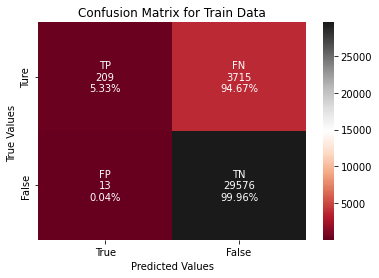

In [ ]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

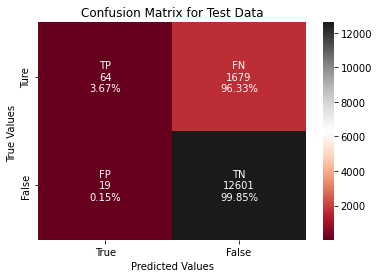

In [ ]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.7858743963210011

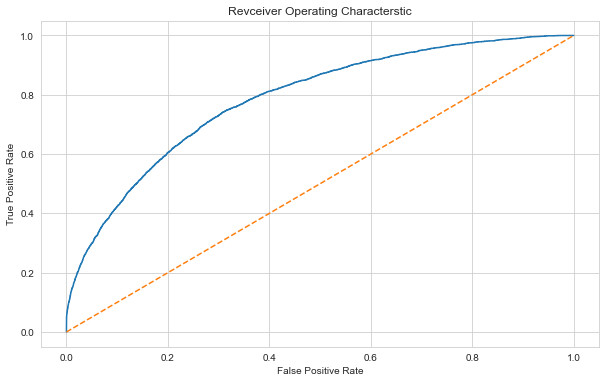

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7344982147289634

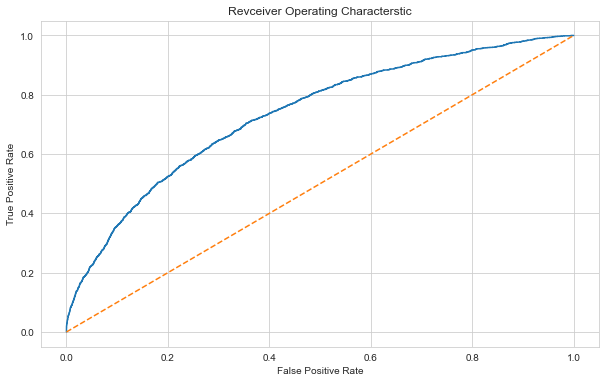

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125
6,XGBoost Classifier,94.572256,88.741906
7,AdaBoostClassifier,88.323934,87.878577
8,GradientBoostingClassifier,88.875959,88.177957


# 10. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=100,max_depth=10)
etc_clf.fit(X_train, y_train)

print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.883148     1.000000   0.88318      0.941574      0.896830
recall         1.000000     0.002294   0.88318      0.501147      0.883180
f1-score       0.937949     0.004577   0.88318      0.471263      0.828661
support    29589.000000  3924.000000   0.88318  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3915     9]]

Test Result:
Accuracy Score: 87.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.878647     0.0  0.878647      0.439323      0.772020
recall         1.000000     0.0  0.878647      0.500000      0.878647
f1-score       0.935404     0.0  0.878647      0.467702      0.821889
support    12620.000000  1743.

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Confusion Matrix

Confusion Matrix for Training

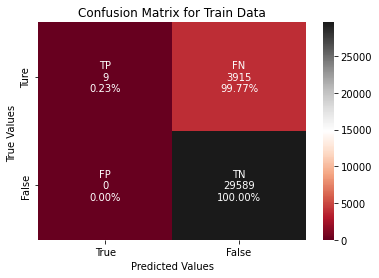

In [ ]:
y_pred = etc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

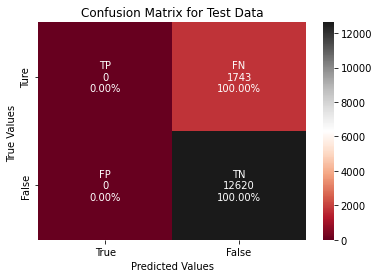

In [ ]:
y_pred = etc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.7246651707392293

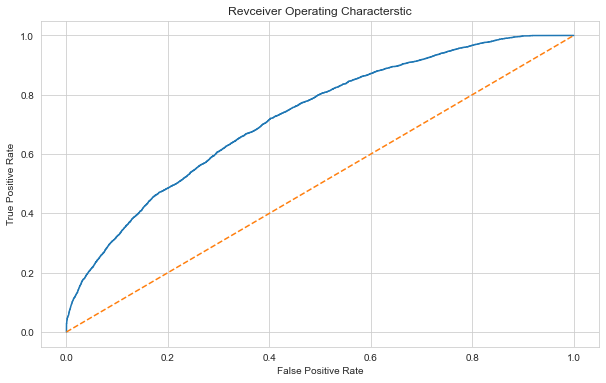

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.676444151066571

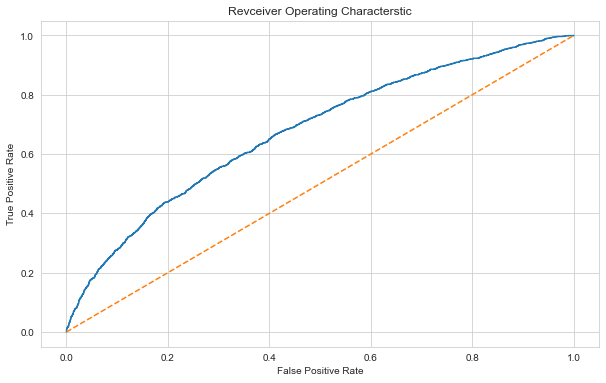

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125
6,XGBoost Classifier,94.572256,88.741906
7,AdaBoostClassifier,88.323934,87.878577
8,GradientBoostingClassifier,88.875959,88.177957
9,ExtraTreesClassifier,88.320950,87.864652


# 11. CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(n_estimators=10)
cbc_clf.fit(X_train, y_train)

print_score(cbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cbc_clf, X_train, y_train, X_test, y_test, train=False)

Learning rate set to 0.5
0:	learn: 0.4144604	total: 179ms	remaining: 1.61s
1:	learn: 0.3535542	total: 206ms	remaining: 824ms
2:	learn: 0.3393456	total: 229ms	remaining: 534ms
3:	learn: 0.3335669	total: 256ms	remaining: 384ms
4:	learn: 0.3265817	total: 286ms	remaining: 286ms
5:	learn: 0.3241832	total: 318ms	remaining: 212ms
6:	learn: 0.3211093	total: 353ms	remaining: 151ms
7:	learn: 0.3181984	total: 381ms	remaining: 95.1ms
8:	learn: 0.3143385	total: 400ms	remaining: 44.5ms
9:	learn: 0.3117120	total: 422ms	remaining: 0us
Train Result:
Accuracy Score: 88.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.888591     0.827068  0.888103      0.857830      0.881388
recall         0.998445     0.056065  0.888103      0.527255      0.888103
f1-score       0.940321     0.105012  0.888103      0.522666      0.842515
support    29589.000000  3924.000000  0.888103  33513.000000  33513

# Confusion Matrix

Confusion Matrix for Training

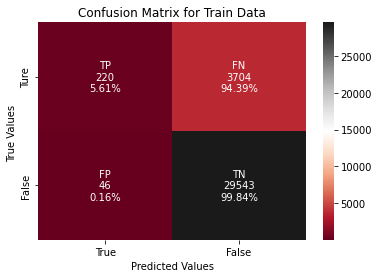

In [ ]:
y_pred = cbc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

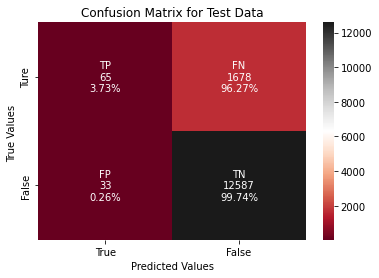

In [ ]:
y_pred = cbc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.7590450908675493

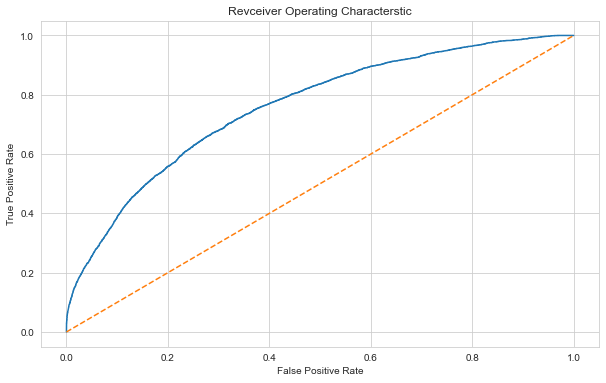

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7243523789520774

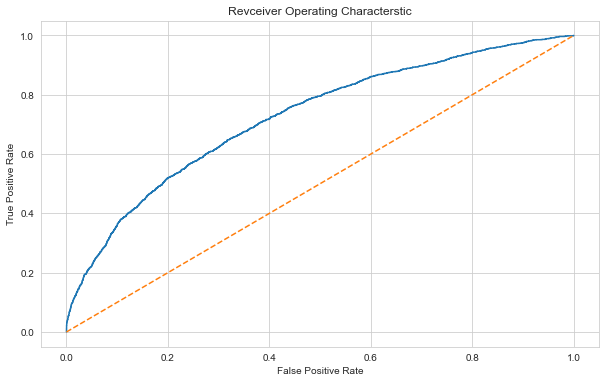

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, cbc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cbc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["CatBoostClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,88.291111,87.850728
1,K-nearest neighbors,90.290335,89.257119
2,Support Vector Machine,88.780473,87.996937
3,LGBMClassifier,90.576791,88.776718
4,Decision Tree Classifier,88.505953,87.781104
5,Random Forest Classifier,88.443291,87.962125
6,XGBoost Classifier,94.572256,88.741906
7,AdaBoostClassifier,88.323934,87.878577
8,GradientBoostingClassifier,88.875959,88.177957
9,ExtraTreesClassifier,88.320950,87.864652


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [ ]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_ab=auc(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
auc_etc=auc(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
auc_cbc=auc(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)

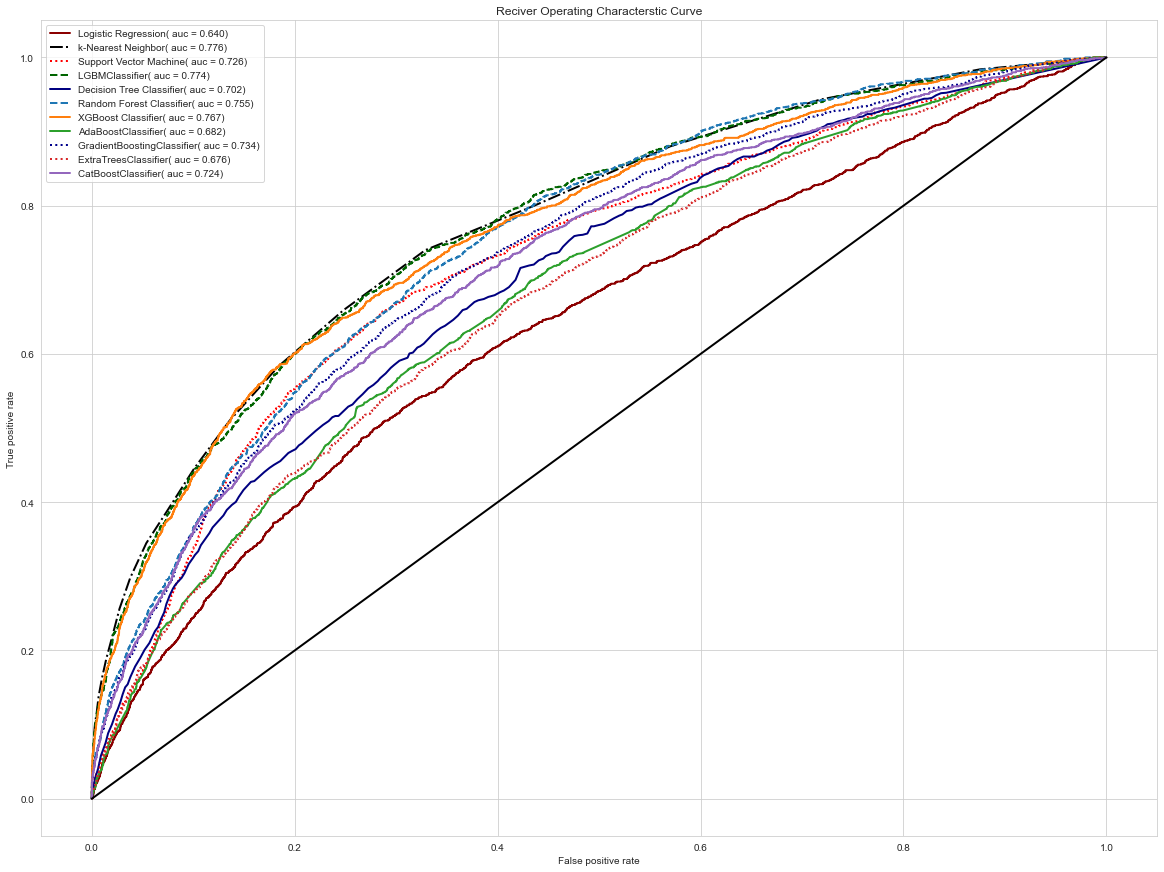

In [ ]:
#Plot All ROC Curve`s

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf,linewidth=2,linestyle='-',label='AdaBoostClassifier( auc = %0.3f)' % auc_ab)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf,linewidth=2,linestyle=':',label='ExtraTreesClassifier( auc = %0.3f)' % auc_etc)
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,linewidth=2,linestyle='solid',label='CatBoostClassifier( auc = %0.3f)' % auc_cbc)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()